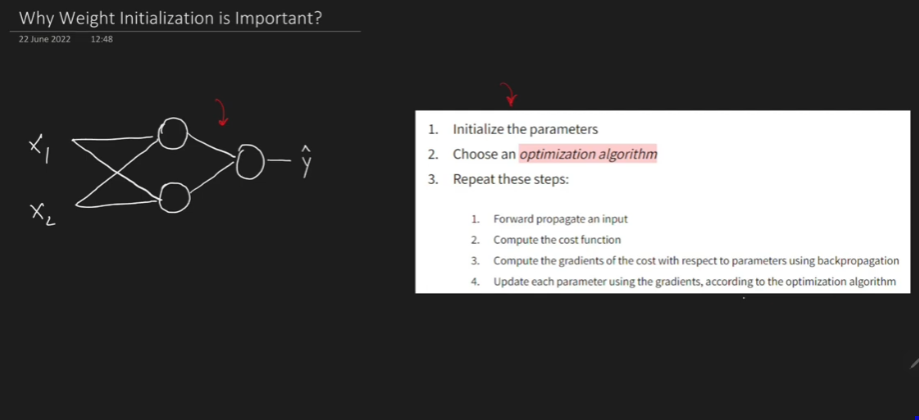
problem: 


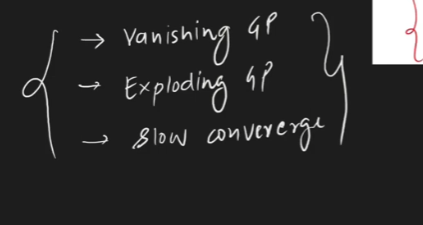

## Wrong Weight Initialization Technique

### Case 1 :Zero Weight and bias initialization :

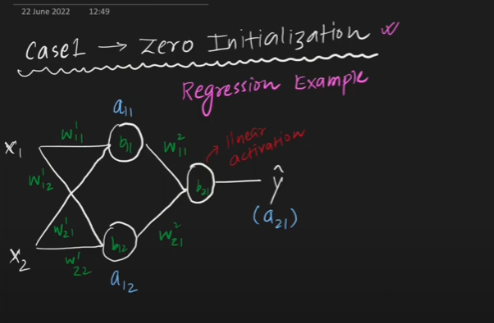

- if we use relu activation: <br>
if the value of weight and bias is zero then dying relu problem will occur and weight updation will not be happen

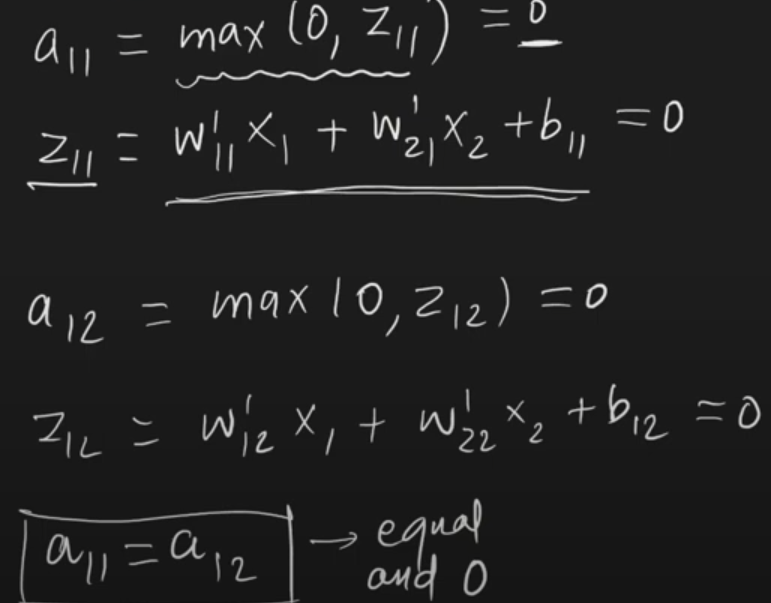
- if we use Tanh :<br>
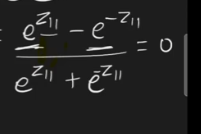

No Weight updation




In [1]:
import pandas as pd
df  =pd.read_csv(r'D:\study\Complete-Deep-Learning-Algorithms\Data\placement.csv')

In [2]:
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


In [3]:
X  = df.iloc[:,:-1]
y = df.iloc[:,-1]
y

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: placed, Length: 100, dtype: int64

In [17]:
# to prove the weight updation not happen if we initialize the zero values
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(2,activation='relu',input_dim =2))
model.add(Dense(1,activation='sigmoid'))

print(model.get_weights())

model.summary()

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

[array([[-0.894168  , -1.136654  ],
       [-0.49312502, -0.98046166]], dtype=float32), array([0., 0.], dtype=float32), array([[ 0.8579289],
       [-0.171857 ]], dtype=float32), array([0.], dtype=float32)]


c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:

history  = model.fit(X,y,epochs=10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5177 - loss: 0.6932  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4969 - loss: 0.6932 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.5094 - loss: 0.6931
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5146 - loss: 0.6932 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4969 - loss: 0.6932 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5406 - loss: 0.6931 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5115 - loss: 0.6932 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.4500 - loss: 0.6932
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5198 - loss: 0.6931 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.5177 - loss: 0.6932


In [22]:
# After Setting Intial Weigth as Zero


import numpy as np 
initial_weights = model.get_weights()
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)



# initialize the zero weight
print("Initializes the zero weights:", initial_weights)
model.set_weights(initial_weights)
history  = model.fit(X,y,epochs=10,verbose=0)
print()
print("Weights After Training:", model.get_weights())

Initializes the zero weights: [array([[0., 0.],
       [0., 0.]]), array([0., 0.]), array([[0.],
       [0.]]), array([0.])]

Weights After Training: [array([[0., 0.],
       [0., 0.]], dtype=float32), array([0., 0.], dtype=float32), array([[0.],
       [0.]], dtype=float32), array([0.00612048], dtype=float32)]


`sigmoid`

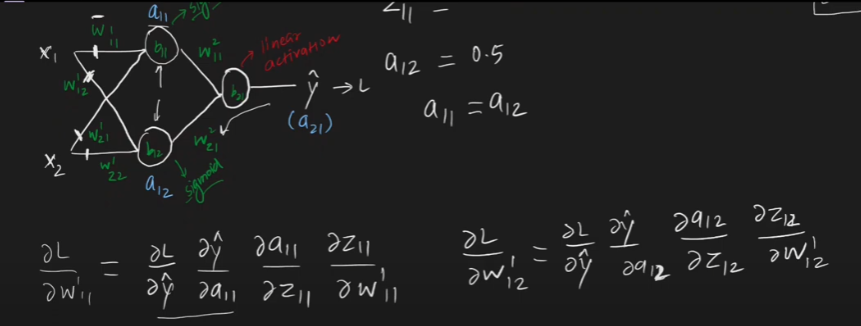

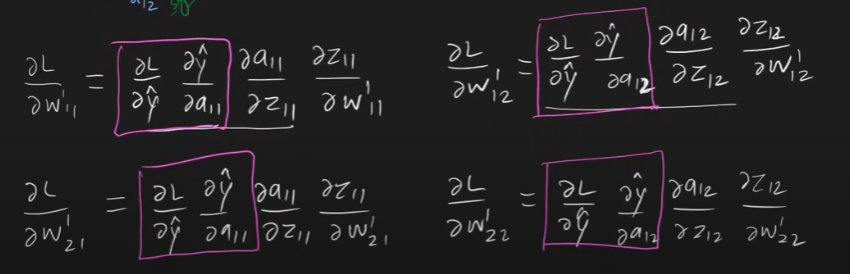

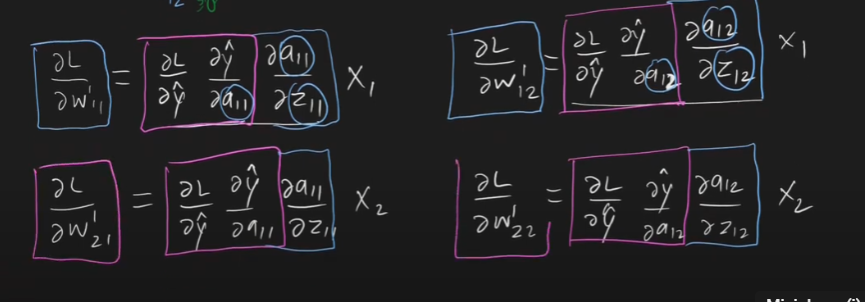

if we are using sigmoid with zero weight in inpput layer or hidden layer then we take number of neuron it will act as single neuron so that's why the it work as linear function and will not able to capture the non-linearity 

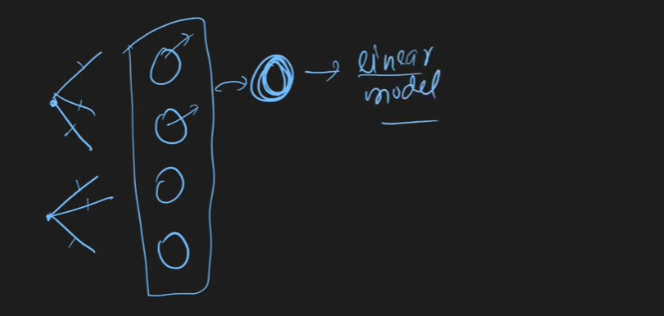

### Case 2 : Initialize the Non_zeros

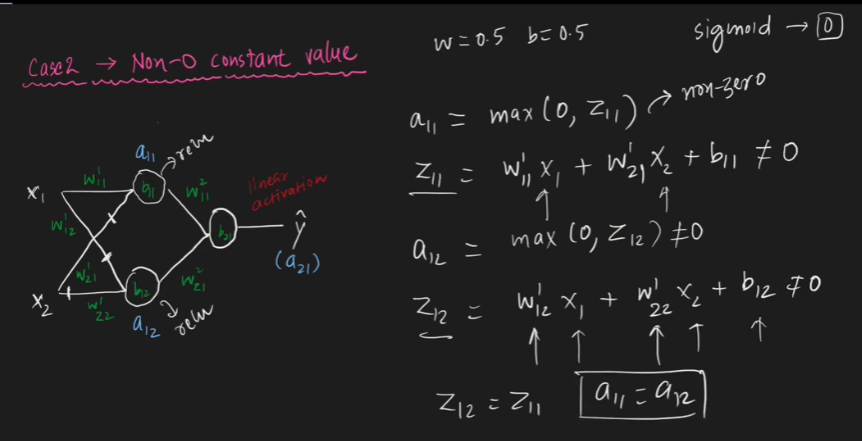

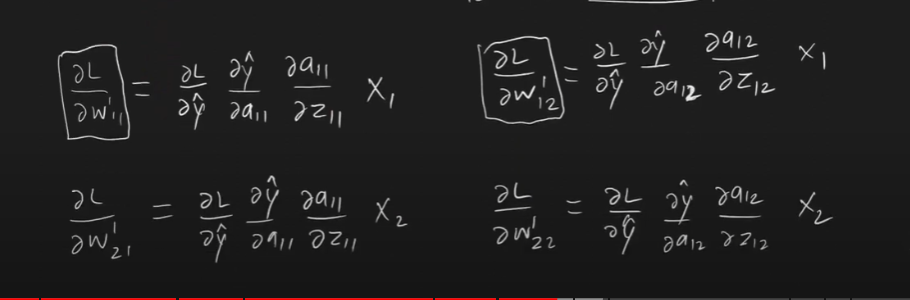

### case 3 Random Initialization
- With Small value

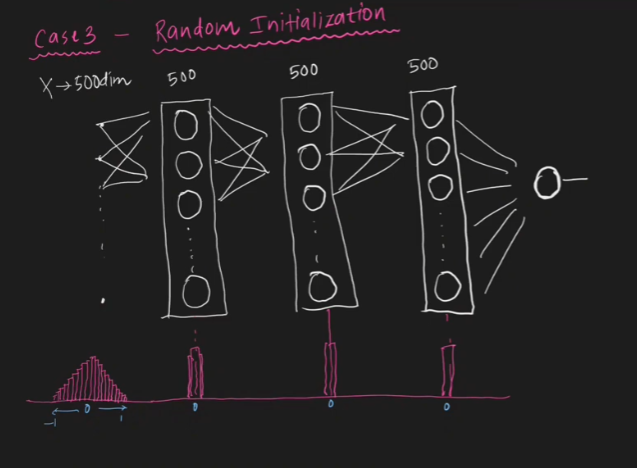


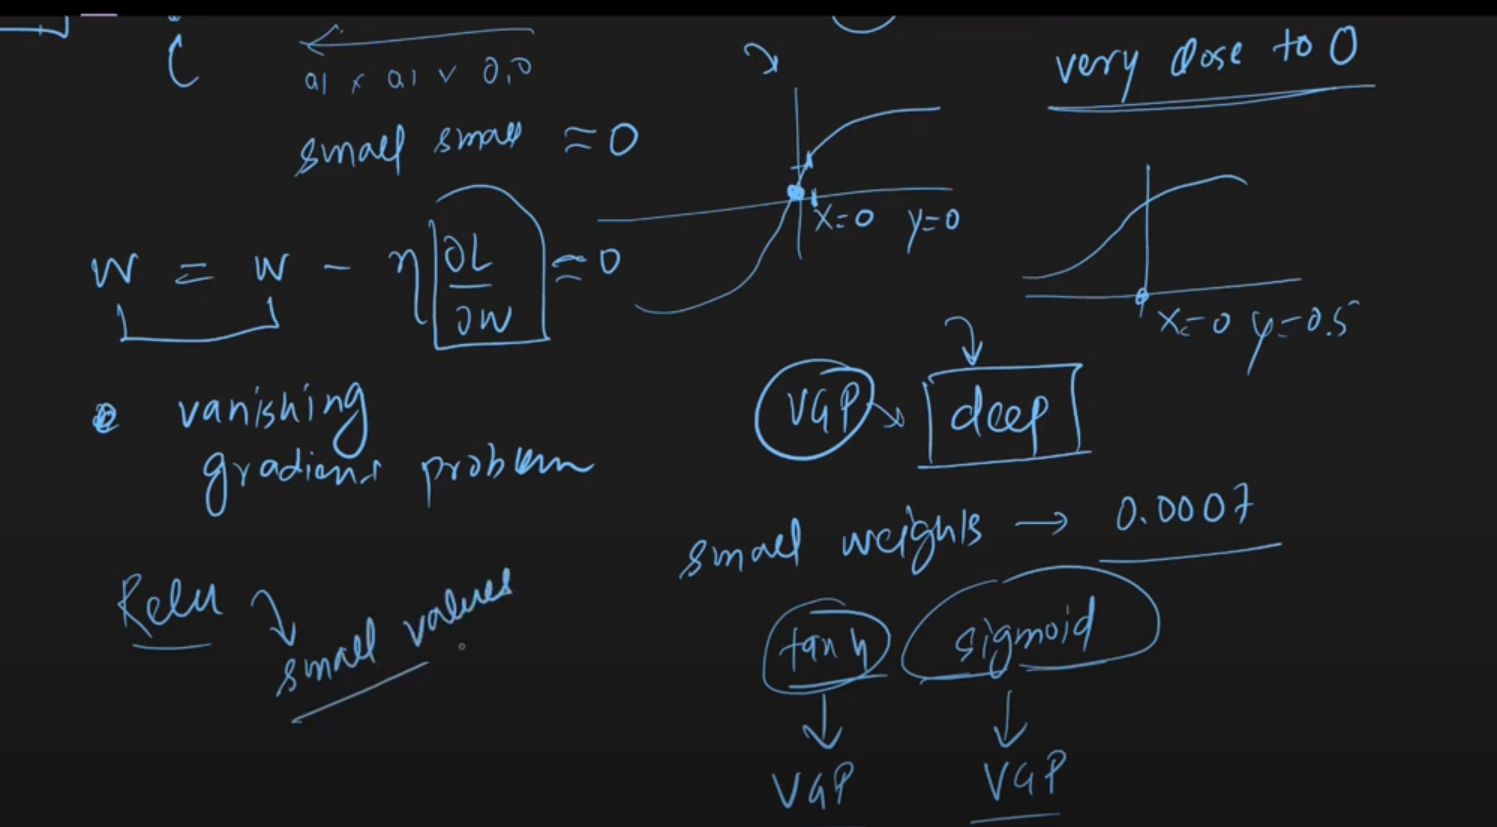

With Large Value

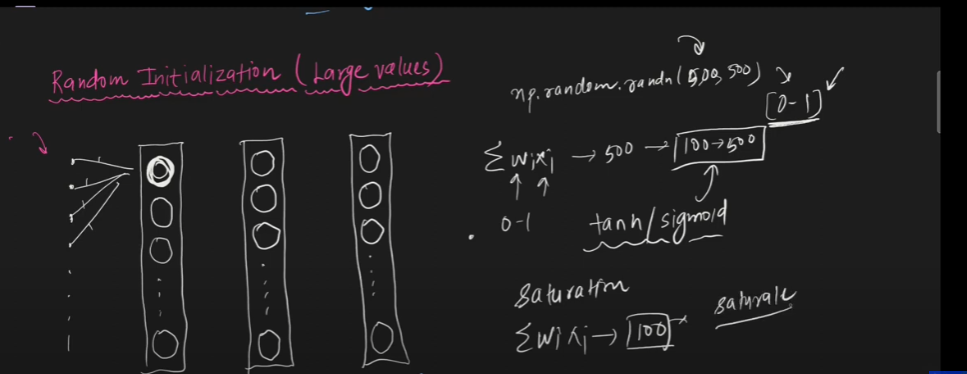

for sigmoid and Tanh

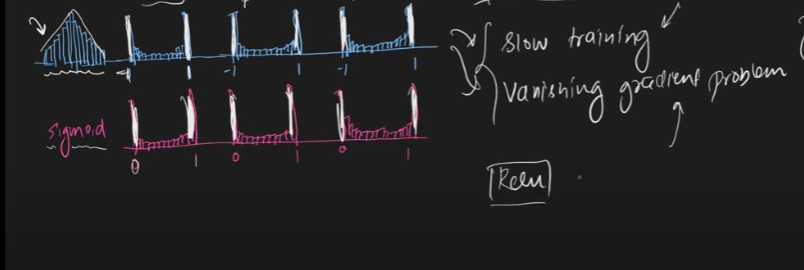

For relu:

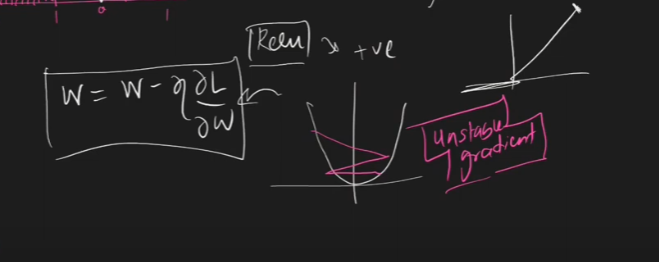

this all the wrong weights initialization techniques

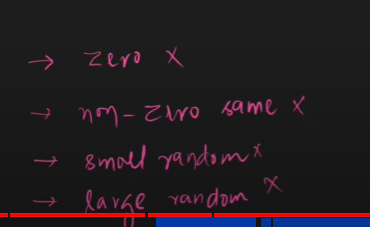

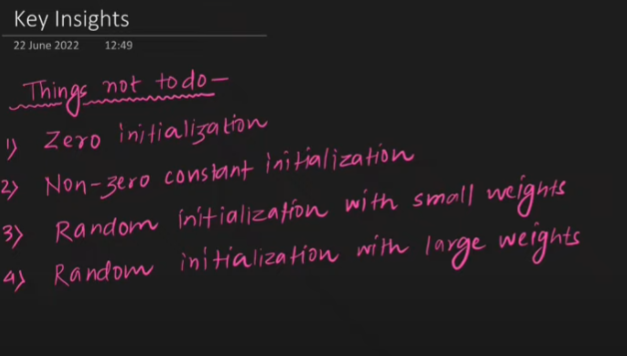

## Two pratical way to initialize the weight
`Xavier or Glorat Initialization` : (if we use the tanh Activaion function it work very well)
`He Initialization `: (if we use the relu it work very well)

both weight initialzation techniques has the normal and uniformal distribution weight initialization

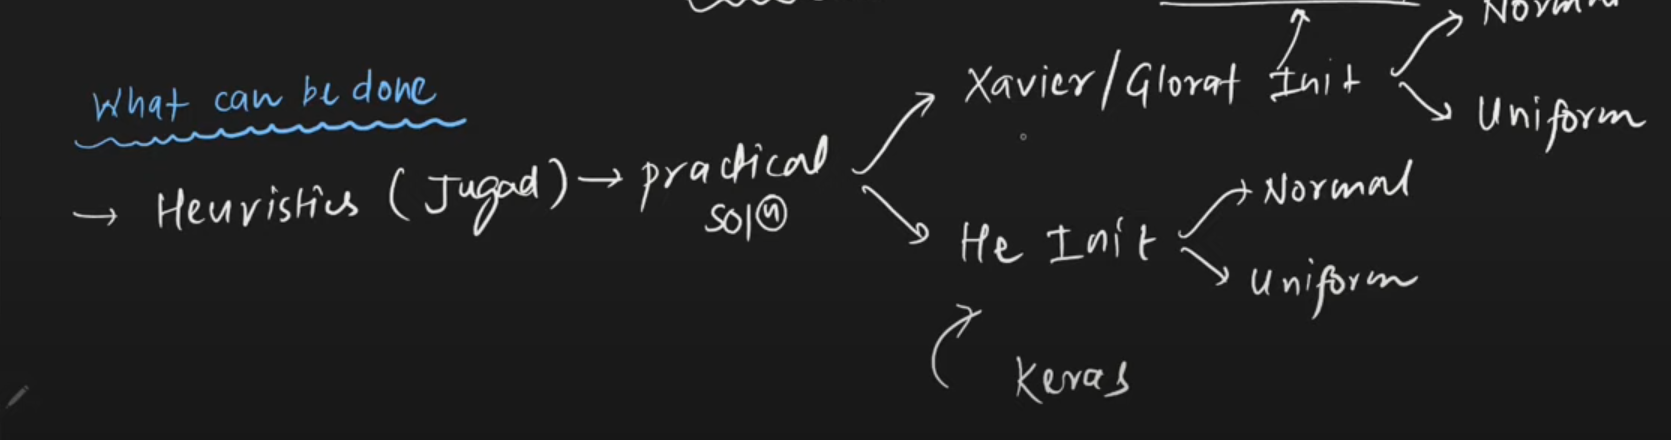

as  we know that 
- if initialize the weight will SMALL (random) number it has the vanishing gradient problem
- if initialize the weight will LARGE (random) number it has the Exploding gradient problem

we want number in between  the small and large value

so here variance = 1/n

n= number of input node 


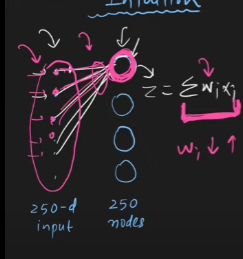

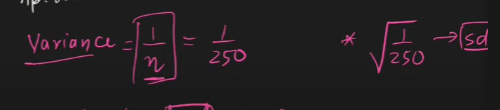

`Xavier Normal`

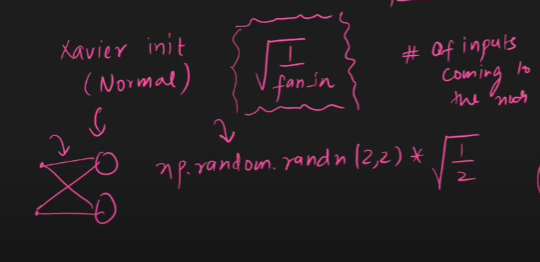


`Xavier Uniform`
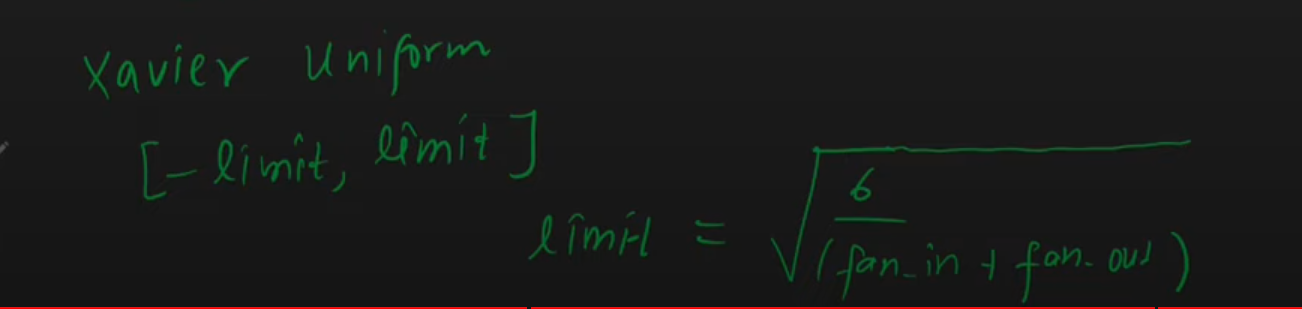

### Code implementaion of `Xavier Normal`


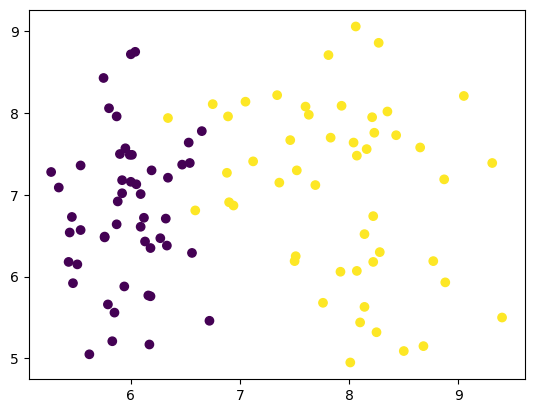

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# print(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)

In [8]:
##Random Weight

In [13]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_decision_regions

model1 = Sequential()
model1.add(Dense(256,activation='tanh',input_dim =2))  ##
model1.add(Dense(64,activation='tanh') )
model1.add(Dense(28,activation='tanh')) 
model1.add(Dense(1,activation='sigmoid'))

# print(model1.get_weights()[1])

# model1.summary()

model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history  = model1.fit(X,y,epochs=100,verbose=0)




c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model1.get_weights()[0]
model1.get_weights()[1] # biase
model1.get_weights()[2]
model1.get_weights()[3] # biase
model1.get_weights()[5]
model1.get_weights()[6] #biase
model1.get_weights()[7]



'While applying the Xavier use tanh activation'


import numpy as np
initial_weights  = model1.get_weights()

initial_weights[0] = np.random.randn(2,256)*np.sqrt(1/2) # 2 input node # wweights
initial_weights[1] = np.zeros(model1.get_weights()[1].shape) # biase

initial_weights[2] = np.random.randn(256,128)*np.sqrt(1/256)  # wieghts
initial_weights[3] = np.zeros(model1.get_weights()[3].shape) # bias

initial_weights[4] = np.random.randn(128,64)*np.sqrt(1/128)  # weight 
initial_weights[5] = np.zeros(model1.get_weights()[5].shape)  #biase

initial_weights[6] = np.random.randn(64,1)*np.sqrt(1/64)  # weigths
initial_weights[7] = np.zeros(model1.get_weights()[7].shape)  #bias




9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 550us/step


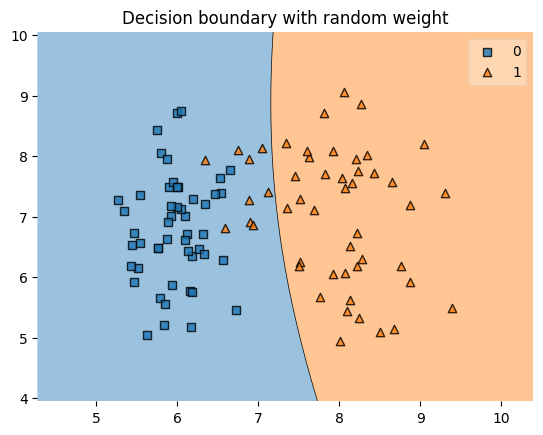

In [15]:
# # convert above line of code in function
# initial_weights  = model1.get_weights()
# for i in range(len(initial_weights)):
#     if i%2==0:
#         initial_weights[i]  = model1.get_weights()
plt.title("Decision boundary with random weight")
plot_decision_regions(X.values,y.astype(int).values,clf=model1)
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 550us/step


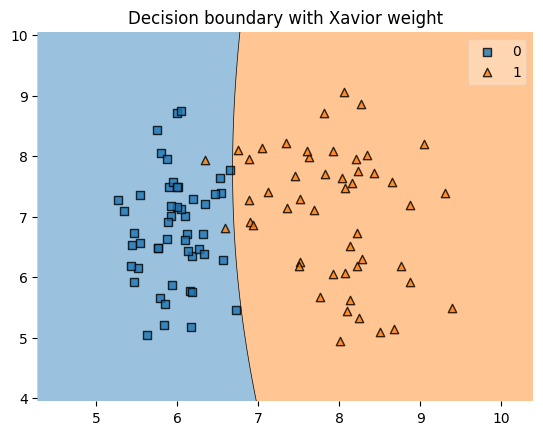

In [16]:
# Weight with Xavior

model1.set_weights=initial_weights  # this manually  


# using function  = 
model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history  = model1.fit(X,y,epochs=100,verbose=0)

plt.title("Decision boundary with Xavior weight")
plot_decision_regions(X.values,y.astype(int).values,clf=model1)
plt.show()

`glorot Weight Initilaization Using Function`

by default : glorot uniform

In [23]:
import tensorflow as tf
tf.__version__
# tf.keras.initializers.GlorotUniform 

'2.16.0-rc0'

c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 544us/step


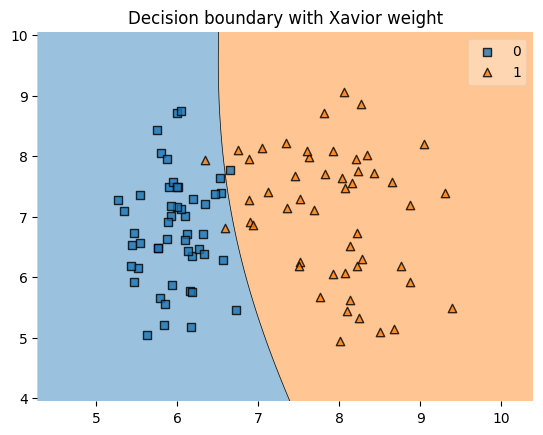

In [27]:
model1 = Sequential()


# model1.add(Dense(256,activation='tanh',input_dim =2,kernel_initializer='glorot_uniform'))  ## 
model1.add(Dense(256,activation='tanh',input_dim =2,kernel_initializer='glorot_normal'))  

model1.add(Dense(64,activation='tanh',kernel_initializer='glorot_normal') )
model1.add(Dense(28,activation='tanh',kernel_initializer='glorot_normal')) 
model1.add(Dense(1,activation='sigmoid'))

# print(model1.get_weights()[1])

# model1.summary()

model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history  = model1.fit(X,y,epochs=100,verbose=0)




# using function  = 
model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history  = model1.fit(X,y,epochs=100,verbose=0)

plt.title("Decision boundary with Xavior weight")
plot_decision_regions(X.values,y.astype(int).values,clf=model1)
plt.show()

`observation` : see the differnce between the random weight and Xaviour weight initialization

# `He normal` : activation should be Relu
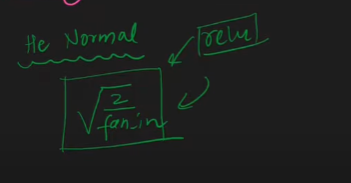



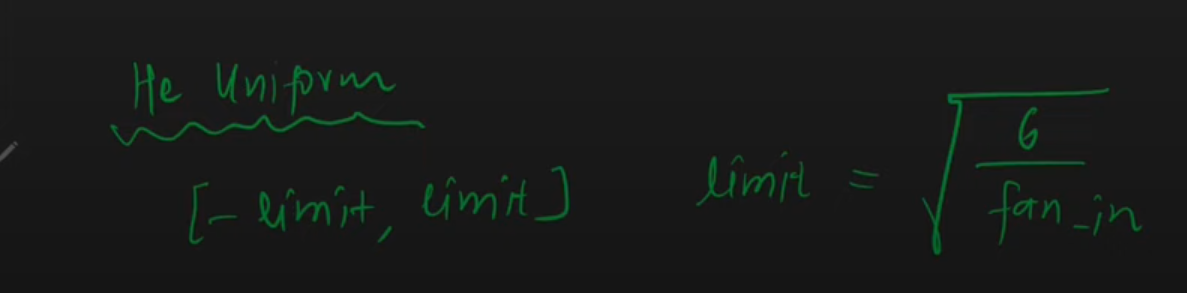


c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 544us/step


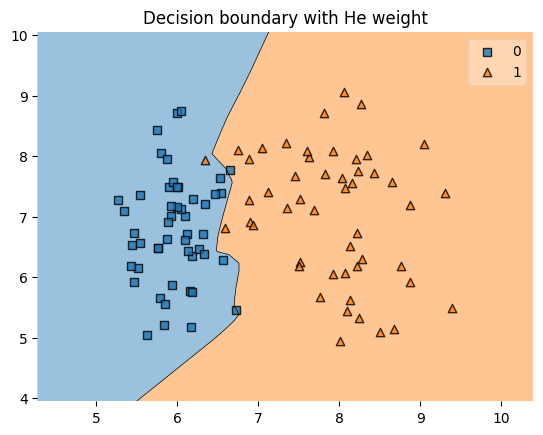

In [32]:
model1 = Sequential()


# model1.add(Dense(256,activation='tanh',input_dim =2,kernel_initializer='he_uniform'))  ## 
model1.add(Dense(256,activation='relu',input_dim =2,kernel_initializer='he_uniform'))  

model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform') )
model1.add(Dense(28,activation='relu',kernel_initializer='he_uniform')) 
model1.add(Dense(1,activation='sigmoid'))

# print(model1.get_weights()[1])

# model1.summary()

model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history  = model1.fit(X,y,epochs=100,verbose=0)




# using function  = 
model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history  = model1.fit(X,y,epochs=1000,verbose=0)

plt.title("Decision boundary with He weight")
plot_decision_regions(X.values,y.astype(int).values,clf=model1)
plt.show()